# 2025 Championship Analysis

In this notebook I will take a look at the 2025 WDC championship mainly.

The idea is: McLaren easily won WCC but lost (or almost lost) the WDC. I'm starting the work on this before the championship actually finished.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os
from manim import *

b:\projetos\f1_analytics\venv\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
# Caminho absoluto da raiz do projeto
project_root = Path.cwd().parents[1]  # se o notebook está em /notebooks
print("Diretório atual:", Path.cwd())
os.chdir(project_root)

from src.modules.data_processing.db_reader import DbReader
from src.analysis.championship.plotter import *
f1_db = DbReader()

Diretório atual: b:\projetos\f1_analytics\notebooks\2025_championship


In [3]:
# Drivers Standings

df_wdc = f1_db.run_query_file('data/db_queries/drivers_standings.sql')
df_wdc = df_wdc[df_wdc['year']==2025]

In [4]:
df_wdc

,round_id,year,race_name,driver_id,driver_ref,driver_number,driver_code,driver_forename,driver_surname,driver_full_name,points,position,wins
0,1143.0,2025,Singapore Grand Prix,857,piastri,81.0,PIA,Oscar,Piastri,Oscar Piastri,336.0,1.0,7
1,1143.0,2025,Singapore Grand Prix,845,norris,4.0,NOR,Lando,Norris,Lando Norris,314.0,2.0,5
2,1143.0,2025,Singapore Grand Prix,831,max_verstappen,33.0,VER,Max,Verstappen,Max Verstappen,273.0,3.0,4
3,1143.0,2025,Singapore Grand Prix,847,russell,63.0,RUS,George,Russell,George Russell,237.0,4.0,2
4,1143.0,2025,Singapore Grand Prix,843,leclerc,16.0,LEC,Charles,Leclerc,Charles Leclerc,173.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1126.0,2025,Australian Grand Prix,795,hamilton,44.0,HAM,Lewis,Hamilton,Lewis Hamilton,1.0,10.0,0
368,1126.0,2025,Australian Grand Prix,841,gasly,10.0,GAS,Pierre,Gasly,Pierre Gasly,0.0,11.0,0
369,1126.0,2025,Australian Grand Prix,851,tsunoda,22.0,TSU,Yuki,Tsunoda,Yuki Tsunoda,0.0,12.0,0
370,1126.0,2025,Australian Grand Prix,838,ocon,31.0,OCO,Esteban,Ocon,Esteban Ocon,0.0,13.0,0


In [5]:
df_wcc = f1_db.run_query_file('data/db_queries/constructors_standings.sql')
df_wcc = df_wcc[df_wcc['year']==2025]

In [6]:
df_wcc

,round_id,year,race_name,team_id,constructor_name,constructor_nationality,points,position,wins
0,1143.0,2025,Singapore Grand Prix,117,McLaren,British,650.0,1.0,12
1,1143.0,2025,Singapore Grand Prix,48,Mercedes,German,325.0,2.0,2
2,1143.0,2025,Singapore Grand Prix,6,Ferrari,Italian,298.0,3.0,0
3,1143.0,2025,Singapore Grand Prix,191,Red Bull,Austrian,290.0,4.0,4
4,1143.0,2025,Singapore Grand Prix,141,Williams,British,102.0,5.0,0
...,...,...,...,...,...,...,...,...,...
175,1126.0,2025,Australian Grand Prix,182,Sauber,Swiss,6.0,6.0,0
176,1126.0,2025,Australian Grand Prix,6,Ferrari,Italian,5.0,7.0,0
177,1126.0,2025,Australian Grand Prix,210,Alpine F1 Team,French,0.0,8.0,0
178,1126.0,2025,Australian Grand Prix,211,RB F1 Team,Italian,0.0,9.0,0


In [7]:
df_races = f1_db.run_query_file('data/db_queries/race_results_report.sql')
df_races = df_races[df_races['year']==2025]

In [8]:
df_races

,race_name,round_id,year,race_date,circuit_name,circuit_country,driver_id,driver_code,driver_ref,driver_forename,...,starting_position,finishing_position,points_scored,laps_completed,time_in_race_ms,fastest_lap_number,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,race_status
0,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,845,NOR,norris,Lando,...,1.0,1,25.0,57.0,01:42:06.304,43.0,1.0,00:01:22.167,NaN,0.0
1,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,831,VER,max_verstappen,Max,...,3.0,2,18.0,57.0,01:42:07.199,43.0,3.0,00:01:23.081,NaN,0.0
2,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,847,RUS,russell,George,...,4.0,3,15.0,57.0,01:42:14.785,43.0,11.0,00:01:25.065,NaN,0.0
3,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,863,ANT,antonelli,Andrea Kimi,...,16.0,4,12.0,57.0,01:42:16.439,43.0,9.0,00:01:24.901,NaN,0.0
4,Australian Grand Prix,1126,2025,2025-03-16,Albert Park Grand Prix Circuit,Australia,846,ALB,albon,Alexander,...,6.0,5,10.0,57.0,01:42:19.077,43.0,8.0,00:01:24.597,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,Singapore Grand Prix,1143,2025,2025-10-05,Marina Bay Street Circuit,Singapore,860,COL,colapinto,Franco,...,16.0,16,0.0,61.0,01:41:05.257,17.0,20.0,00:01:37.182,NaN,1.0
355,Singapore Grand Prix,1143,2025,2025-10-05,Marina Bay Street Circuit,Singapore,862,BOR,bortoleto,Gabriel,...,14.0,17,0.0,61.0,01:41:09.12,16.0,19.0,00:01:37.126,NaN,1.0
356,Singapore Grand Prix,1143,2025,2025-10-05,Marina Bay Street Circuit,Singapore,838,OCO,ocon,Esteban,...,17.0,18,0.0,61.0,01:41:09.5,32.0,16.0,00:01:36.646,NaN,1.0
357,Singapore Grand Prix,1143,2025,2025-10-05,Marina Bay Street Circuit,Singapore,841,GAS,gasly,Pierre,...,19.0,19,0.0,61.0,01:41:09.828,53.0,2.0,00:01:34.573,NaN,1.0


## Championship Evolution: 

### WCC

McLaren easily won the WCC. Let's take a look:

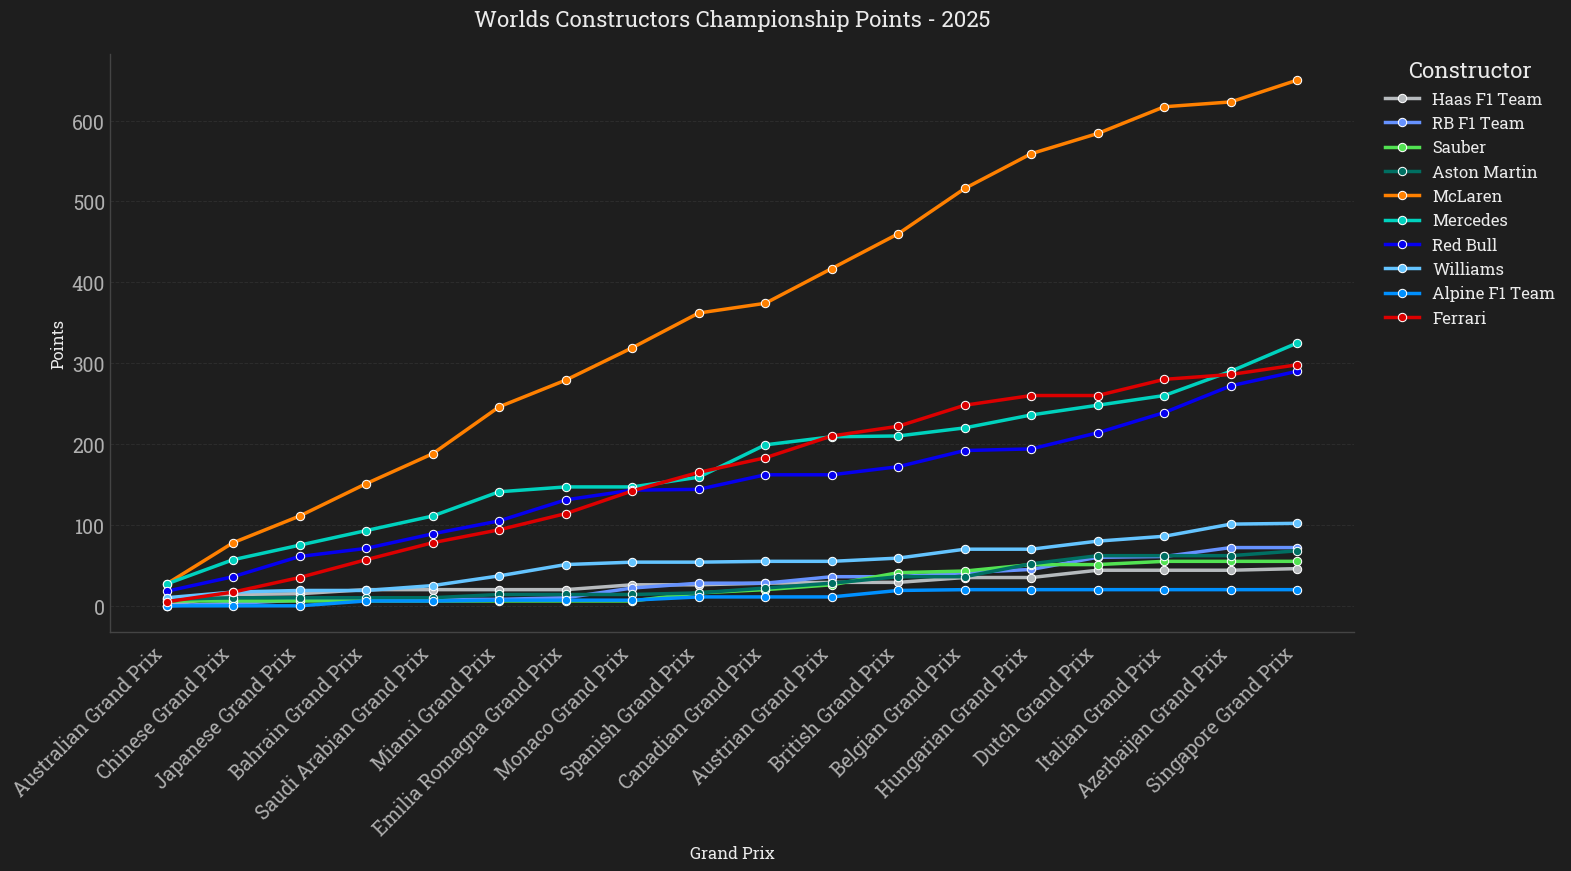

In [9]:
plot_wcc(
    df_campeonato=df_wcc,
    )

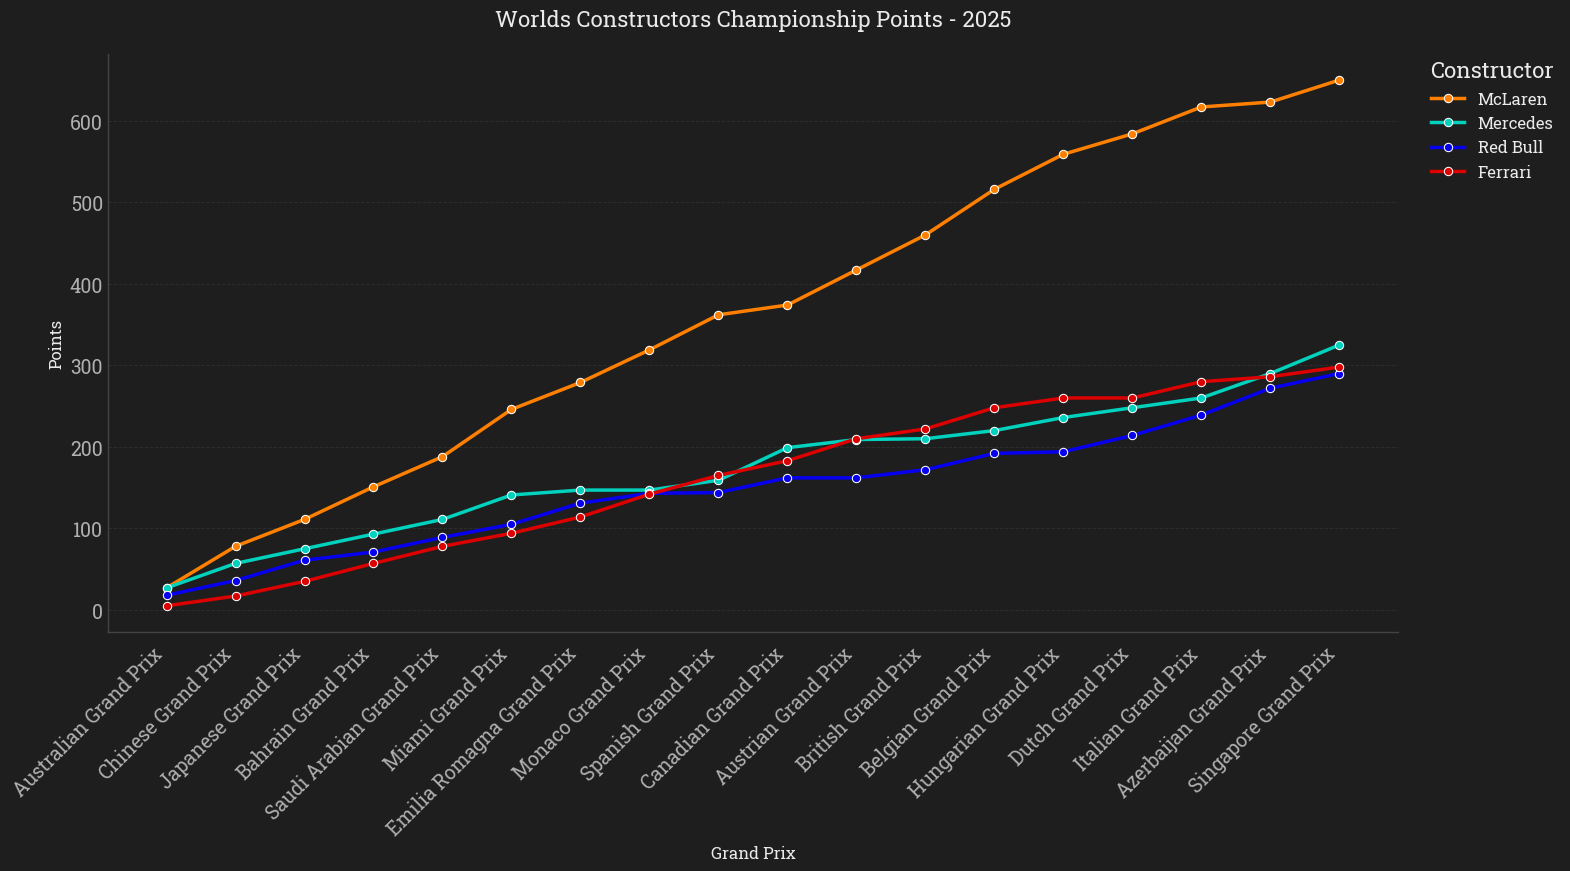

In [10]:
plot_wcc(
    df_campeonato=df_wcc,
    times_destaque=['McLaren', 'Red Bull', 'Ferrari', 'Mercedes']
    )

Above we can see the evolution of the 2025 WCC.

By that we can see that McLaren clearly had the advantage along the year.

The only other teams fighting with eachother for the 3 top positions are Mercedes, Red Bull and Ferrari (somehow).

### Manim

Animated WCC chart:

In [11]:
# Correção dos nomes dos construtores para coincidir com o dicionário de cores

dict_fix_constructor_names = {
    'RB F1 Team': 'VCARB',
    'Haas F1 Team': 'Haas',
    'Alpine F1 Team': 'Alpine'
}

df_wcc['constructor_name'] = df_wcc['constructor_name'].replace(dict_fix_constructor_names)

In [12]:
dict_team_colors = {
    "Red Bull": "#3671C6",       # Azul Clássico
    "Mercedes": "#27F4D2",       # Verde/Ciano Petronas (brilha bem no escuro)
    "Ferrari": "#E80020",        # Rosso Corsa
    "McLaren": "#FF8000",        # Laranja Papaya
    "Aston Martin": "#229971",   # British Racing Green
    "Alpine": "#0090FF",         # Azul Alpine (Nota: às vezes usam rosa da BWT)
    "Williams": "#64C4FF",       # Azul Celeste
    "VCARB": "#6692FF",          # Azul 'Visa Cash App' (mais claro que a RBR)
    "Sauber": "#52E252",         # Verde Neon (Kick/Stake branding)
    "Haas": "#B6BABD",           # Cinza/Branco (neutro)
}

In [13]:
df_wcc

,round_id,year,race_name,team_id,constructor_name,constructor_nationality,points,position,wins
0,1143.0,2025,Singapore Grand Prix,117,McLaren,British,650.0,1.0,12
1,1143.0,2025,Singapore Grand Prix,48,Mercedes,German,325.0,2.0,2
2,1143.0,2025,Singapore Grand Prix,6,Ferrari,Italian,298.0,3.0,0
3,1143.0,2025,Singapore Grand Prix,191,Red Bull,Austrian,290.0,4.0,4
4,1143.0,2025,Singapore Grand Prix,141,Williams,British,102.0,5.0,0
...,...,...,...,...,...,...,...,...,...
175,1126.0,2025,Australian Grand Prix,182,Sauber,Swiss,6.0,6.0,0
176,1126.0,2025,Australian Grand Prix,6,Ferrari,Italian,5.0,7.0,0
177,1126.0,2025,Australian Grand Prix,210,Alpine,French,0.0,8.0,0
178,1126.0,2025,Australian Grand Prix,211,VCARB,Italian,0.0,9.0,0


In [14]:
y_max = df_wcc['points'].max() + 10
x_max = df_wcc['round_id'].max() - df_wcc['round_id'].min() + 1
df_wcc_grouped = df_wcc.groupby('constructor_name')


In [15]:
dict_axis_config = {
    "include_numbers": True, 
    "color": GRAY, 
    'include_ticks': False, 
    'include_tip': True,
    'tip_shape': StealthTip,
    'tip_height': 0.1,
    'tip_width': 0.1,
    'font_size': 24,
}

In [21]:
df_wcc['constructor_name'].unique()

array(['McLaren', 'Mercedes', 'Ferrari', 'Red Bull', 'Williams', 'VCARB',
       'Aston Martin', 'Sauber', 'Haas', 'Alpine'], dtype=object)

In [22]:
team_file_map = {
    "Red Bull": "red_bull.png",
    "Ferrari": "ferrari.png",
    "McLaren": "mclaren.png",
    "Mercedes": "mercedes.png",
    "Aston Martin": "aston_martin.png",
    "Alpine": "alpine.png",
    "Williams": "williams.png",
    "VCARB": "vcarb.png",
    "Sauber": "sauber.png",
    "Haas": "haas.png"
}

In [24]:
%%manim -pqh -v WARNING WCC_Animated_Chart

from scipy.interpolate import make_interp_spline

class WCC_Animated_Chart(Scene):
    def construct(self):
        self.camera.background_color = "#111111"
        my_font = "Roboto Slab"

        # EIXOS
        ax = Axes(
            x_range=[0, x_max, 1],
            y_range=[0, y_max, 50],
            x_length=11, y_length=6.5,
            axis_config=dict_axis_config,
            x_axis_config={"font_size": 16, "label_direction": DOWN},
            y_axis_config={"font_size": 16, "label_direction": LEFT},
        )

        x_lbl = ax.get_x_axis_label(Text("Round", font=my_font, font_size=18, color=GRAY_B).next_to(ax.x_axis, DOWN, buff=0.2))
        y_lbl = ax.get_y_axis_label(Text("Points", font=my_font, font_size=18, color=GRAY_B).next_to(ax.y_axis, UP, buff=0.2))

        # Gridlines
        grid_group = VGroup()
        for i in range(50, int(y_max), 50):
            line = DashedLine(
                start=ax.c2p(0, i), end=ax.c2p(x_max, i),
                dash_length=0.1, color=GRAY_D, stroke_width=1, stroke_opacity=0.2
            )
            grid_group.add(line)

        self.add(ax, x_lbl, y_lbl, grid_group)

        # --- ASSETS ---
        logos_path = os.path.join("notebooks/2025_championship/" ,"assets", "team_logos") 


        # FAZENDO LINHA COM SUAVIZAÇÃO SPLINE
        race_progress = ValueTracker(0)

        for team, data in df_wcc_grouped:
            color = dict_team_colors.get(team, WHITE)
            data_sorted = data.sort_values('round_id')
            
            # Pegamos os dados brutos (poucos pontos, linhas retas)
            global_min = df_wcc['round_id'].min()
            x_raw = (data_sorted['round_id'] - global_min).to_numpy()
            y_raw = data_sorted['points'].to_numpy()

            # Capturamos o ultimo ponto X real desta equipe para usar de limite no logo
            team_max_x = x_raw.max()

            # Geramos 300 pontos virtuais entre o começo e o fim para dar a suavidade
            x_smooth = np.linspace(x_raw.min(), x_raw.max(), 300)
            
            # make_interp_spline cria a função matemática da curva (k=3 significa cúbica/suave)
            spline = make_interp_spline(x_raw, y_raw, k=3)
            y_smooth = spline(x_smooth)
            
            # Clipamos para evitar que a curva "mergulhe" para baixo em dados cumulativos
            y_smooth = np.maximum(y_smooth, 0) 

            # --- LOGO ---
            filename = team_file_map.get(team)
            full_path = os.path.join(logos_path, filename) if filename else "nada"
            
            if filename and os.path.exists(full_path):
                logo = ImageMobject(full_path).set_width(0.28)
            else:
                logo = Dot(color=color, radius=0.08)

            # Updater do Logo agora usa a SPLINE para seguir a curva exata
            # [ALTERADO] Adicionei o parametro limit e o uso de min()
            def update_logo_func(mob, spl=spline, limit=team_max_x):
                t = race_progress.get_value()
                # Trava o t no limite dos dados da equipe para evitar extrapolação (logo voando)
                t_clamped = min(t, limit)
                
                current_y_smooth = spl(t_clamped)
                mob.move_to(ax.c2p(t_clamped, current_y_smooth)).shift(RIGHT * 0.3)
            
            logo.add_updater(update_logo_func)
            self.add(logo)

            # --- LINHA SUAVE ---
            # Agora plotamos usando os arrays smooth (x_smooth, y_smooth) e não os raw
            line = always_redraw(lambda x=x_smooth, y=y_smooth, c=color: 
                VGroup(
                    # Glow
                    ax.plot_line_graph(
                        x_values = x[x <= race_progress.get_value()],
                        y_values = y[x <= race_progress.get_value()],
                        line_color=c, add_vertex_dots=False, stroke_width=8, stroke_opacity=0.2,
                    ),
                    # Linha Principal
                    ax.plot_line_graph(
                        x_values = x[x <= race_progress.get_value()],
                        y_values = y[x <= race_progress.get_value()],
                        line_color=c, add_vertex_dots=False, stroke_width=3.5, stroke_opacity=1,
                    )
                )
            )
            self.add(line)

        title = Text("2025 World Constructors Championship", font=my_font, font_size=32, color=GRAY)
        title.to_edge(UP, buff=0.5)

        # --- PLAY ---
        # Animação de entrada dos eixos
        self.play(Write(title) ,Create(ax), Write(x_lbl), Write(y_lbl), Write(grid_group), run_time=2)
        
        # Corrida
        self.play(race_progress.animate.set_value(x_max), run_time=6, rate_func=linear)
        self.wait(2)

Manim Community v0.19.1

<string>:67: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


### WDC

In contrast, if we take a look at the WDC

No drivers specified. Plotting Top 5: ['Oscar Piastri', 'Lando Norris', 'Max Verstappen', 'George Russell', 'Charles Leclerc']


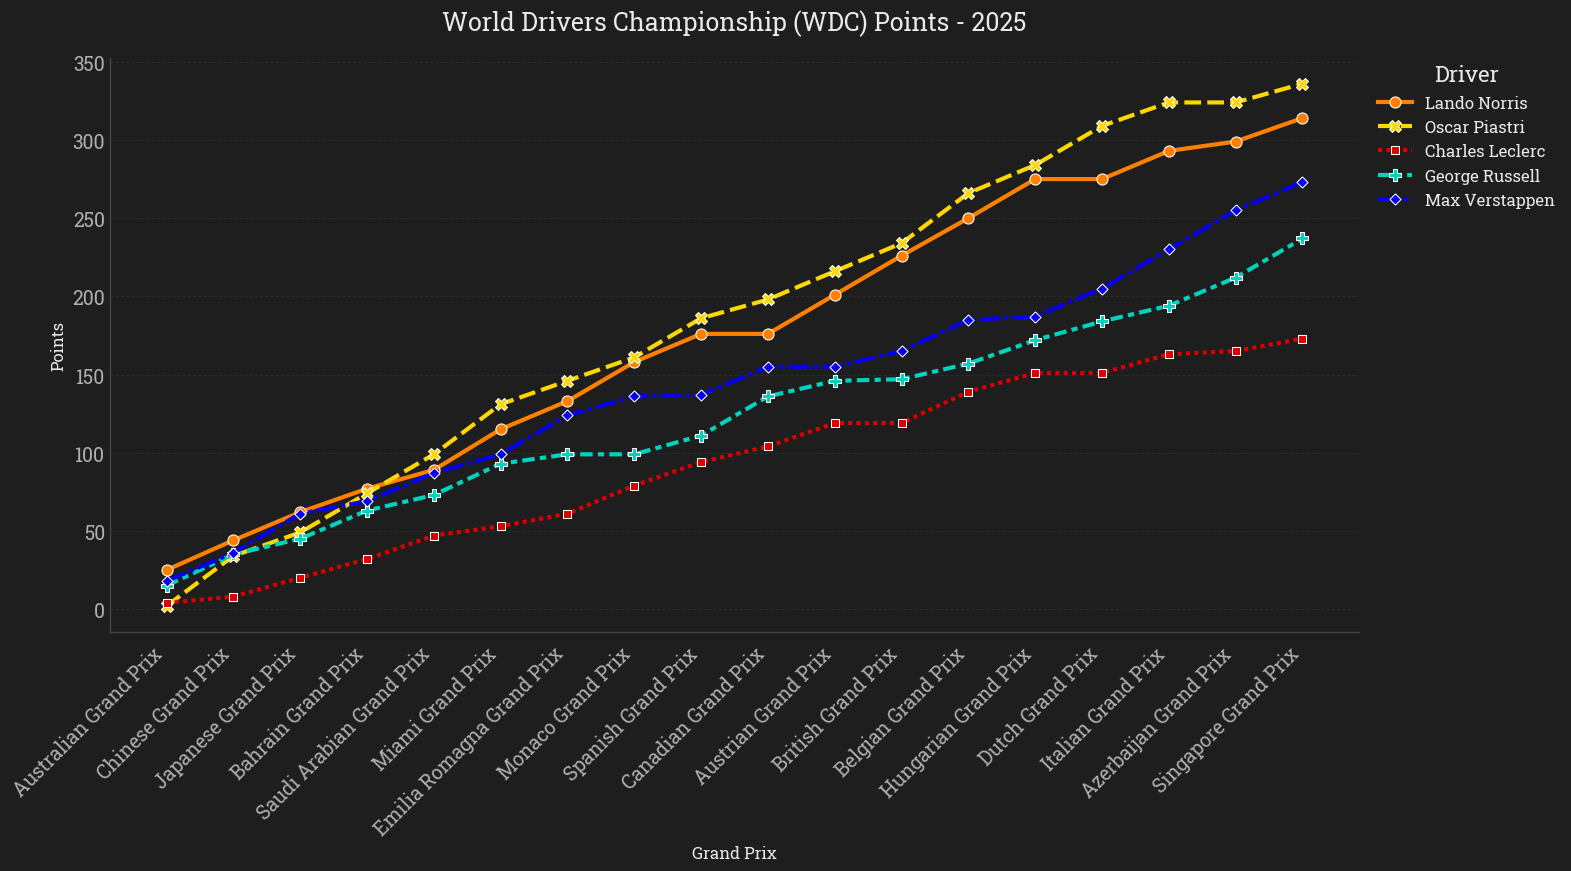

In [ ]:
plot_wdc(df_campeonato=df_wdc)

Gráfico salvo em: b:\projetos\f1_analytics\grafs\2025_championship\drivers_evolution_2025_verstappen_norris_piastri_safe.png


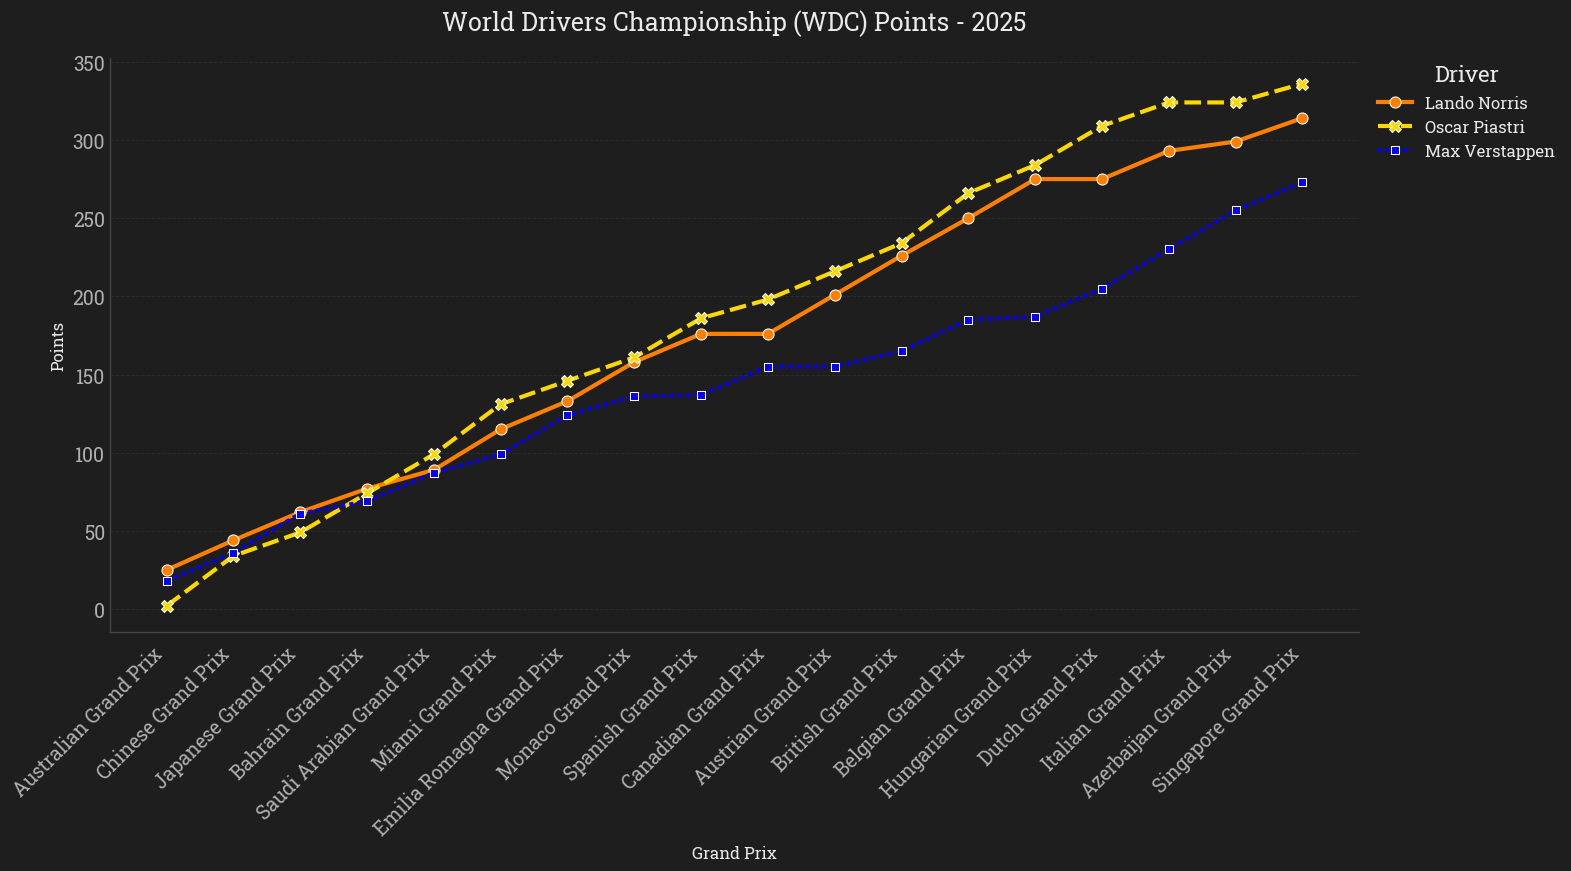

In [ ]:
plot_wdc(
    df_campeonato=df_wdc,
    pilotos_destaque=[
        'Max Verstappen',
        'Lando Norris',
        'Oscar Piastri'
    ],
    save_fig=True,
    save_path='grafs/2025_championship'
    )